In [97]:
import pandas as pd
import numpy as np
training_set = pd.read_excel("Data_Train.xlsx")

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
print("Columns: \n",training_set.columns,"\n")
print("Number of columns: ",len(training_set.columns),"\n")
print("Number of rows: ",len(training_set),"\n")
print("Training set data types: \n",training_set.dtypes,"\n")
print("Do null values exist?: ",training_set.isnull().values.any(),"\n")
print("Number of null values: \n",training_set.isnull().sum(),"\n")

Columns: 
 Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object') 

Number of columns:  11 

Number of rows:  10683 

Training set data types: 
 Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object 

Do null values exist?:  True 

Number of null values: 
 Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64 



In [100]:
training_set = training_set.dropna()
print(len(training_set))

10682


In [101]:
training_set['Journey_Day'] = pd.to_datetime(training_set.Date_of_Journey, format = '%d/%m/%Y').dt.day
training_set['Journey_Month'] = pd.to_datetime(training_set.Date_of_Journey, format = '%d/%m/%Y').dt.month

training_set.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)

print(training_set.columns)

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Day',
       'Journey_Month'],
      dtype='object')


In [102]:
duration = list(training_set['Duration'])

for i in range(len(duration)):
    if (len(duration[i].split()) != 2):
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i]:
            duration[i] = "0h {}".format(duration[i].strip())
            
dur_hours = []
dur_minutes = []

for i in range(len(duration)):
    dur_hours.append(int(duration[i].split()[0][:-1]))
    dur_minutes.append(int(duration[i].split()[1][:-1]))
    
training_set['Duration_hours'] = dur_hours
training_set['Duration_minutes'] = dur_minutes
training_set.drop(labels = 'Duration', axis = 1, inplace=True)

print(training_set.columns)

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Total_Stops', 'Additional_Info', 'Price', 'Journey_Day',
       'Journey_Month', 'Duration_hours', 'Duration_minutes'],
      dtype='object')


In [103]:
training_set['Arrival_Hour'] = pd.to_datetime(training_set.Arrival_Time).dt.hour
training_set['Arrival_Minutes'] = pd.to_datetime(training_set.Arrival_Time).dt.minute
training_set.drop(labels = 'Arrival_Time', axis = 1, inplace = True)

training_set['Departure_Hour'] = pd.to_datetime(training_set.Dep_Time).dt.hour
training_set['Departure_Minutes'] = pd.to_datetime(training_set.Dep_Time).dt.minute
training_set.drop(labels = 'Dep_Time', axis = 1, inplace = True)

print(training_set.columns)

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_Day', 'Journey_Month',
       'Duration_hours', 'Duration_minutes', 'Arrival_Hour', 'Arrival_Minutes',
       'Departure_Hour', 'Departure_Minutes'],
      dtype='object')


In [129]:
training_set.tail(10)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_hours,Duration_minutes,Arrival_Hour,Arrival_Minutes,Departure_Hour,Departure_Minutes
10673,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,2 stops,No info,16704,27,5,15,0,4,25,13,25
10674,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,In-flight meal not included,11087,12,3,24,45,21,20,20,35
10675,Air India,Mumbai,Hyderabad,BOM → HYD,non-stop,No info,3100,9,6,1,20,7,40,6,20
10676,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,9794,1,5,8,40,19,0,10,20
10677,SpiceJet,Banglore,Delhi,BLR → DEL,non-stop,No check-in baggage included,3257,21,5,2,40,8,35,5,55
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,2,30,22,25,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,2,35,23,20,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,3,0,11,20,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,2,40,14,10,11,30
10682,Air India,Delhi,Cochin,DEL → GOI → BOM → COK,2 stops,No info,11753,9,5,8,20,19,15,10,55


In [105]:
Y_train = training_set.iloc[:,6].values
X_train = training_set.iloc[:, training_set.columns != 'Price'].values

In [106]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.1, random_state=123)

In [107]:
Y_test = y_test
Y_test

array([ 8996, 15400, 10844, ...,  9264,  7155,  4148])

In [108]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
le2 = LabelEncoder()

In [109]:
x_train[:,0] = le1.fit_transform(x_train[:,0])
x_train[:,1] = le1.fit_transform(x_train[:,1])
x_train[:,2] = le1.fit_transform(x_train[:,2])
x_train[:,3] = le1.fit_transform(x_train[:,3])
x_train[:,4] = le1.fit_transform(x_train[:,4])
x_train[:,5] = le1.fit_transform(x_train[:,5])

x_test[:,0] = le2.fit_transform(x_test[:,0])
x_test[:,1] = le2.fit_transform(x_test[:,1])
x_test[:,2] = le2.fit_transform(x_test[:,2])
x_test[:,3] = le2.fit_transform(x_test[:,3])
x_test[:,4] = le2.fit_transform(x_test[:,4])
x_test[:,5] = le2.fit_transform(x_test[:,5])

In [110]:
print(pd.DataFrame(x_train).head())

   0  1  2    3  4  5   6  7   8   9  10  11  12  13
0  1  3  0   76  1  8  24  3  41  20  23  15   5  55
1  1  2  1  104  3  8  27  5   3   5  21  10  18   5
2  1  2  1  110  1  8  15  5  20  20   9  25  13   5
3  3  3  0   78  0  8  15  4   4  25  23  45  19  20
4  4  3  0   64  0  8   1  5  12  15   8  15  20   0


In [111]:
print(pd.DataFrame(x_test).head())

   0  1  2   3  4  5   6  7   8   9  10  11  12  13
0  1  3  0  20  0  4  12  5   4   5  13  15   9  10
1  4  2  1  52  0  2   3  3   9  50  18  50   9   0
2  4  3  0  24  0  2   9  6   6   5  22  35  16  30
3  3  0  2   8  4  4  15  6   2  50   6  50   4   0
4  4  3  0  24  0  4  24  3  16   5  22  35   6  30


In [112]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

In [113]:
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.fit_transform(x_test)

y_train = y_train.reshape(len(y_train), 1)
y_train = sc_X.fit_transform(y_train)
y_train = y_train.ravel()

print(y_test)
y_test = y_test.reshape(len(y_test), 1)
print(y_test)
y_test = sc_X.fit_transform(y_test)
print(y_test)
y_test = y_test.ravel()
print(y_test)

[ 8996 15400 10844 ...  9264  7155  4148]
[[ 8996]
 [15400]
 [10844]
 ...
 [ 9264]
 [ 7155]
 [ 4148]]
[[-0.03141707]
 [ 1.48193319]
 [ 0.40528988]
 ...
 [ 0.03191489]
 [-0.46646982]
 [-1.17706385]]
[-0.03141707  1.48193319  0.40528988 ...  0.03191489 -0.46646982
 -1.17706385]


/anaconda3/envs/tensflo/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/tensflo/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/tensflo/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/tensflo/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/tensflo/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionW

In [114]:
print(pd.DataFrame(x_train).head())

          0         1         2         3         4         5         6  \
0 -1.254422  0.891168 -0.974999  0.091413 -0.101705  0.497978  1.244750   
1 -1.254422  0.044814 -0.297441  0.855691  1.378519  0.497978  1.598562   
2 -1.254422  0.044814 -0.297441  1.019465 -0.101705  0.497978  0.183316   
3 -0.404256  0.891168 -0.974999  0.146004 -0.841817  0.497978  0.183316   
4  0.020827  0.891168 -0.974999 -0.236134 -0.841817  0.497978 -1.467804   

          7         8         9        10        11        12        13  
0 -1.473650  3.619048 -0.493306  1.414422 -0.588279 -1.300763  1.634408  
1  0.247742 -0.850365 -1.376880  1.122554 -0.890481  0.957636 -1.032547  
2  0.247742  1.149110 -0.493306 -0.628657  0.016127  0.089021 -1.032547  
3 -0.612954 -0.732749 -0.198781  1.414422  1.224939  1.131359 -0.232460  
4  0.247742  0.208180 -0.787831 -0.774592 -0.588279  1.305082 -1.299242  


In [115]:
print(pd.DataFrame(x_test).head())

          0         1         2         3         4         5         6  \
0 -1.598036  0.880640 -0.963246 -0.789211 -0.777608  0.529131 -0.245908   
1  0.199544  0.000823 -0.280414  0.754375 -0.777608 -1.935534 -1.310182   
2  0.199544  0.880640 -0.963246 -0.596262 -0.777608 -1.935534 -0.600666   
3 -0.399649 -1.758810  0.402417 -1.368055  1.467532  0.529131  0.108850   
4  0.199544  0.880640 -0.963246 -0.596262 -0.777608  0.529131  1.173124   

          7         8         9        10        11        12        13  
0  0.272874 -0.757258 -1.374826 -0.104422 -0.576520 -0.620245 -0.785463  
1 -1.413265 -0.163689  1.327360  0.619491  1.591369 -0.620245 -1.313718  
2  1.115943 -0.519831 -1.374826  1.198622  0.662274  0.612503  0.271045  
3  1.115943 -0.994685  1.327360 -1.117902  1.591369 -1.500779 -1.313718  
4 -1.413265  0.667307 -1.374826  1.198622  0.662274 -1.148566  0.271045  


In [116]:
from sklearn.svm import SVR
svr = SVR(kernel = "rbf")
svr.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [117]:
y_pred = svr.predict(x_test)
print(y_pred)


[-0.21448654  0.78390516  0.68102838 ...  0.06362514 -0.06773593
 -0.89125182]


In [118]:
from sklearn.metrics import r2_score

In [119]:
print(r2_score(y_test, y_pred)*100,"%")

74.41653877372781 %


In [120]:
Y_pred = y_pred
Y_pred
Y_pred = sc_X.inverse_transform(Y_pred.reshape(len(Y_pred), 1))
Y_pred

array([[ 8221.31028119],
       [12446.17523496],
       [12010.834571  ],
       ...,
       [ 9398.18730983],
       [ 8842.31053678],
       [ 5357.46241992]])

<function matplotlib.pyplot.show(*args, **kw)>

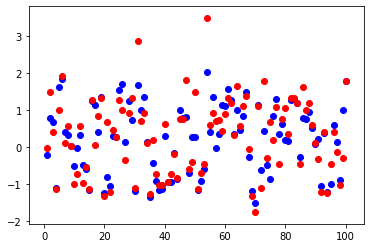

In [123]:
import matplotlib.pyplot as plt

base = range(1, len(y_pred)+1)
plt.scatter(base[:100],y_pred[:100], color='blue')
plt.scatter(base[:100],y_test[:100], color='red')
plt.show

(array([ 3.,  1.,  6.,  9., 13., 19., 44., 54., 46., 54., 27., 17., 23.,
        35., 17., 27., 22., 29., 34., 29., 28., 33., 35., 50., 63., 49.,
        31., 34., 25., 34., 14., 24., 21., 28., 16., 18., 14., 12.,  9.,
         5.,  5.,  2.,  2.,  1.,  0.,  0.,  2.,  2.,  2.,  1.]),
 array([-1.74896132e+00, -1.66164205e+00, -1.57432278e+00, -1.48700351e+00,
        -1.39968424e+00, -1.31236497e+00, -1.22504570e+00, -1.13772644e+00,
        -1.05040717e+00, -9.63087899e-01, -8.75768630e-01, -7.88449361e-01,
        -7.01130093e-01, -6.13810824e-01, -5.26491556e-01, -4.39172287e-01,
        -3.51853018e-01, -2.64533750e-01, -1.77214481e-01, -8.98952124e-02,
        -2.57594374e-03,  8.47433249e-02,  1.72062594e-01,  2.59381862e-01,
         3.46701131e-01,  4.34020399e-01,  5.21339668e-01,  6.08658937e-01,
         6.95978205e-01,  7.83297474e-01,  8.70616743e-01,  9.57936011e-01,
         1.04525528e+00,  1.13257455e+00,  1.21989382e+00,  1.30721309e+00,
         1.39453235e+00,  1.4818

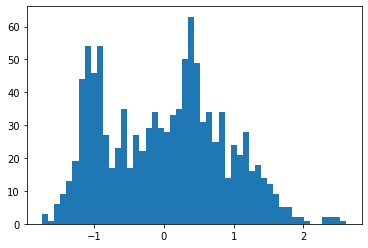

In [126]:
plt.hist(y_pred, bins=50)

(array([17., 10.,  7., 30., 89., 50., 56., 32., 45., 37., 66., 36., 38.,
        29., 30., 38., 54., 51., 31., 28., 37., 24., 47., 41., 28., 35.,
        28.,  3., 17., 11.,  8.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  2.,
         0.,  2.,  0.,  1.,  1.,  0.,  0.,  0.,  2.,  0.,  3.]),
 array([-1.74161628, -1.6213281 , -1.50103991, -1.38075172, -1.26046354,
        -1.14017535, -1.01988716, -0.89959898, -0.77931079, -0.6590226 ,
        -0.53873442, -0.41844623, -0.29815805, -0.17786986, -0.05758167,
         0.06270651,  0.1829947 ,  0.30328289,  0.42357107,  0.54385926,
         0.66414745,  0.78443563,  0.90472382,  1.02501201,  1.14530019,
         1.26558838,  1.38587657,  1.50616475,  1.62645294,  1.74674112,
         1.86702931,  1.9873175 ,  2.10760568,  2.22789387,  2.34818206,
         2.46847024,  2.58875843,  2.70904662,  2.8293348 ,  2.94962299,
         3.06991118,  3.19019936,  3.31048755,  3.43077574,  3.55106392,
         3.67135211,  3.79164029,  3.91192848,  4.03221667,

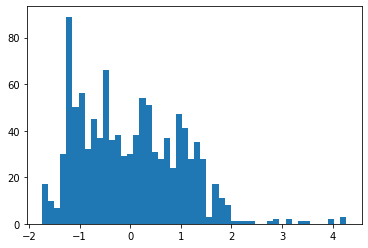

In [127]:
plt.hist(y_test, bins=50)